In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data Splitting Process

from sklearn.model_selection import train_test_split

# Training Process

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Performance Measures 

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [3]:
mnist_train = pd.read_csv("data/train.csv")
mnist_test  = pd.read_csv("data/test.csv")

# Take copies of the master dataframes
train = mnist_train.copy()
test = mnist_test.copy()

In [4]:
X, y = train.drop(labels = ["label"],axis = 1).to_numpy(), train["label"]
X.shape

(42000, 784)

# Plotting the data set

8

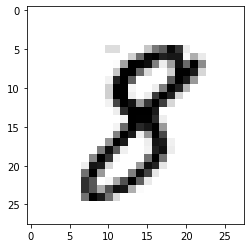

In [5]:
some_digit = X[20]
some_digit_show = plt.imshow(X[20].reshape(28,28), cmap=mpl.cm.binary)
y[20]

In [6]:
y = y.astype(np.uint8)

# Data Splitting Process

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training Process

## Training a binary classifier

In [9]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

#### STOCHASTIC GRADIENT DESCENT

In [10]:
sgd_clf = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

#### RANDOM FOREST ALGORITHM

In [12]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
rf_clf.fit(X_train, y_train_8)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
rf_clf.predict([some_digit])

array([ True])